
Premise:

You are working for a law firm as a data consultant. Your law firm has a group of financial law experts who analyze legal documents from all around the world and mark them as either relevant to financial law or not. Every document that is relevant to financial law must be shown to the relevant clients within **72 working hours**. In previous years, the financial law experts could keep up with the volume of documents. However, the volume has increased by 10x due to increased regulations from governments around the world due to different economic issues and it will be too costly for the company to hire 10x the number of financial legal experts. You were brought in as a data consultant to help them out by automating some/all parts of the analysis.

In [1]:
## Basic Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.listdir('/kaggle/input/ai-engineering-phase-2-datasets')


['regulations.csv', 'relevance_data.csv']

In [3]:
RelevanceData = pd.read_csv('/kaggle/input/ai-engineering-phase-2-datasets/relevance_data.csv')
RegulationsData = pd.read_csv('/kaggle/input/ai-engineering-phase-2-datasets/regulations.csv')


In [4]:
RegulationsData.shape

(134083, 8)

In [5]:
RegulationsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134083 entries, 0 to 134082
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Title            133687 non-null  object
 1   RegulatorId      134083 non-null  object
 2   SourceLanguage   134083 non-null  object
 3   DocumentTypeId   134083 non-null  object
 4   PublicationDate  134083 non-null  object
 5   IsPdf            134083 non-null  bool  
 6   Content          133480 non-null  object
 7   DocumentID       134083 non-null  object
dtypes: bool(1), object(7)
memory usage: 7.3+ MB


In [6]:
RegulationsData.isnull().sum()

Title              396
RegulatorId          0
SourceLanguage       0
DocumentTypeId       0
PublicationDate      0
IsPdf                0
Content            603
DocumentID           0
dtype: int64

In [7]:
def unique_regulations():

  """
  This function iterates through each row and determines the number of unique values in each column
  """

  for col in RegulationsData.columns:
    A = len(RegulationsData[col].unique())
    print(f"{col}: {A}")

unique_regulations()


Title: 81407
RegulatorId: 868
SourceLanguage: 124
DocumentTypeId: 117
PublicationDate: 39546
IsPdf: 2
Content: 93570
DocumentID: 97584


In [8]:
## Drop rows with missing values
RegulationsData = RegulationsData.dropna()

## Drop PublicationDate Column
#RegulationsData.drop("PublicationDate", axis=1, inplace=True)
#RelevanceData.drop(["RequirementSource", "User"], axis=1, inplace=True)



In [9]:
for column in RegulationsData.columns:
  print(f"{column}: {RegulationsData[column].nunique()}")

Title: 81244
RegulatorId: 866
SourceLanguage: 117
DocumentTypeId: 117
PublicationDate: 39372
IsPdf: 2
Content: 93567
DocumentID: 96978


In [10]:
RelevanceData.head(5)

,RequirementSource,ContainsRelevantRegulation,User,DocumentID
0,Regulation,True,00002B53,99f7-77d9-4c72-a45a-049dd24b
1,Regulation,False,00002B53,104e-8d13-4537-8e56-415dacd8
2,Regulation,False,0000164E,b634-3641-4f16-96cc-99e1cb85
3,Guidance,False,000006A5,f452-1e80-482e-ab6b-86d02faf
4,Guidance,False,000006A5,4449-7753-44ab-a7cd-0559f4ab


<Axes: xlabel='RequirementSource', ylabel='count'>

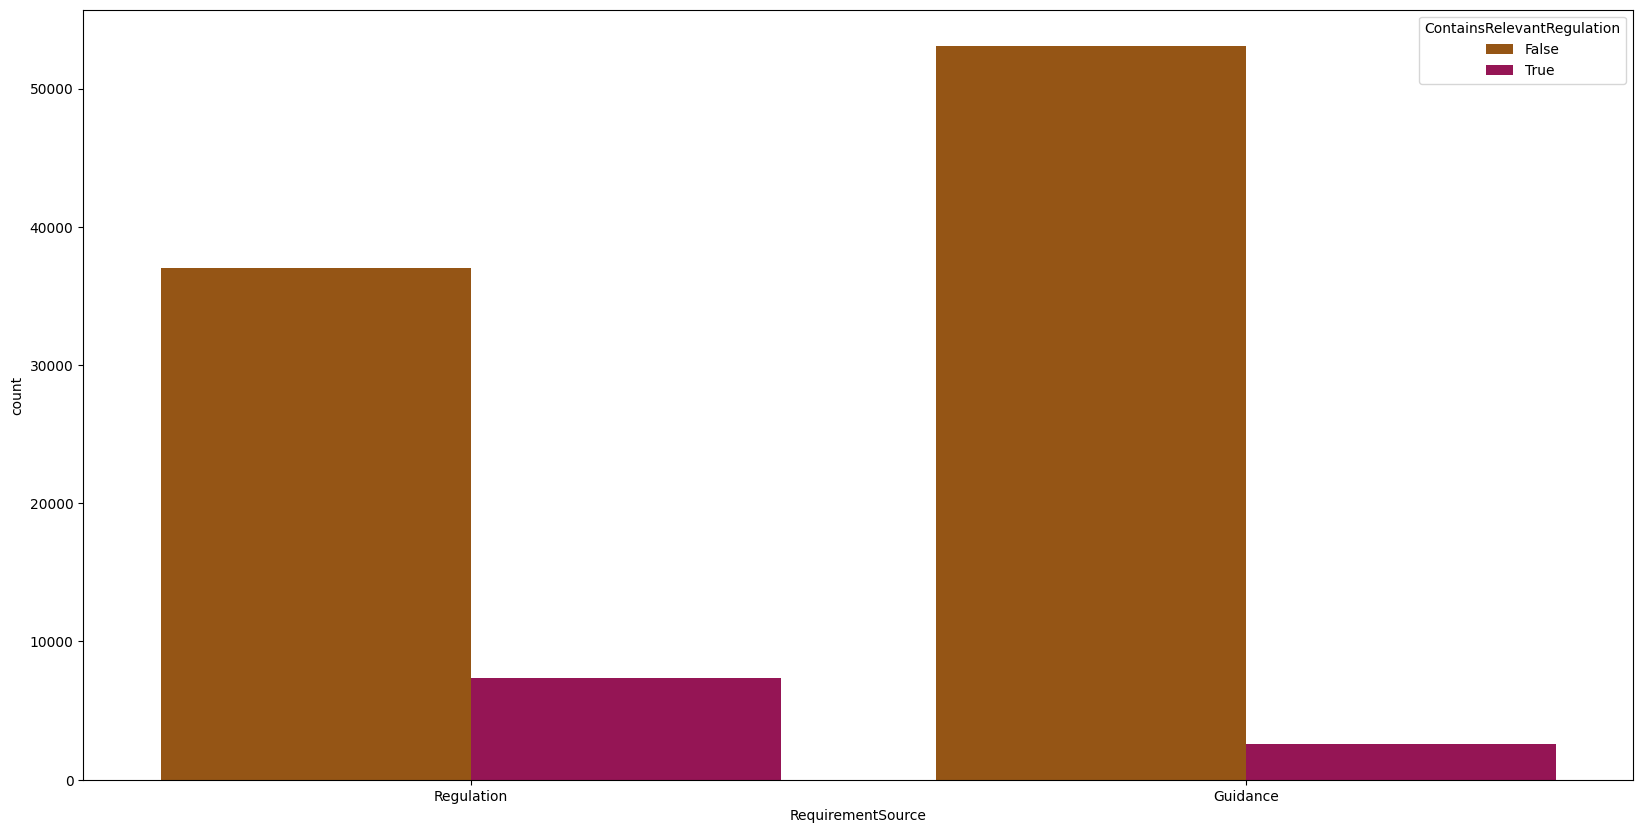

In [11]:
plt.figure(figsize=(20, 10))

sns.countplot(x = "RequirementSource", hue = "ContainsRelevantRegulation", data = RelevanceData, palette = "brg_r")



In [12]:
RelevanceData.shape

(100000, 4)

In [13]:
RelevanceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   RequirementSource           100000 non-null  object
 1   ContainsRelevantRegulation  100000 non-null  bool  
 2   User                        100000 non-null  object
 3   DocumentID                  100000 non-null  object
dtypes: bool(1), object(3)
memory usage: 2.4+ MB


In [14]:
RelevanceData.isnull().sum()

RequirementSource             0
ContainsRelevantRegulation    0
User                          0
DocumentID                    0
dtype: int64

In [15]:
## Drop duplicate values
RegulationsData = RegulationsData.drop_duplicates(keep='first')
RelevanceData = RelevanceData.drop_duplicates(keep='first')

In [16]:
# Identify rows with common regulations in both datasets
common_regulations = RegulationsData[RegulationsData['DocumentID'].isin(RelevanceData['DocumentID'])]

In [17]:
common_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId',
       'PublicationDate', 'IsPdf', 'Content', 'DocumentID'],
      dtype='object')

In [18]:
common_regulations.shape

(77243, 8)

In [19]:
common_regulations.head(5)

,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2
1,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402
2,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6
15,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73
16,"SENATE: WITH AMENDMENTS, THERE WAS OPINION TO ...",cfd5-f561-4a3b-ac10-32891147,Spanish,9e76-0039-4827-a596-e841437e,2024-08-02 05:21:00.003000+00:00,False,"<div> August 1, 2024 </div> <br> <div><p>Chang...",4af2-d0f5-465c-a166-1338695c


Merging the Regulations Dataset and the Relevance Dataset

- EDA will be done on this merged dataset to get relevant information that will be used to determine the label for what we are to predict

In [20]:
import pandas as pd

merged_df = pd.merge(RegulationsData, RelevanceData, on='DocumentID', how='inner')

merged_df = pd.DataFrame(merged_df)

merged_df.head(10)


,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Regulation,False,00000B75
1,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Guidance,False,00000B75
2,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402,Guidance,False,00003102
3,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6,Guidance,False,00000E6A
4,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73,Guidance,True,0000095C
5,"SENATE: WITH AMENDMENTS, THERE WAS OPINION TO ...",cfd5-f561-4a3b-ac10-32891147,Spanish,9e76-0039-4827-a596-e841437e,2024-08-02 05:21:00.003000+00:00,False,"<div> August 1, 2024 </div> <br> <div><p>Chang...",4af2-d0f5-465c-a166-1338695c,Guidance,False,00000E6A
6,On approval of the minimum amount of expenses ...,591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,2024-08-02 11:31:00.006000+00:00,False,Current version from 31.07.2024.<div><div>In a...,41aa-740c-42fc-97d3-c8e2450e,Guidance,False,8EB9D6ED
7,On approval of the minimum amount of expenses ...,591c-e7a9-4783-a908-6ed20f4b,Russian,dc3a-5f62-4f46-b14f-8617166b,2024-08-02 11:31:00.006000+00:00,False,Current version from 31.07.2024.<div><div>In a...,41aa-740c-42fc-97d3-c8e2450e,Regulation,True,8EB9D6ED
8,Tax administration continued to enhance the ta...,4769-7d4a-47ec-8fc3-f22d1c38,Vietnamese,8587-12b2-42fc-a196-646413cb,2024-08-02 02:51:00.016000+00:00,False,"<div> <div> </div> <div></div> <!--div class=""...",03f4-0785-47be-b174-a9dcae39,Guidance,False,00002F30
9,Statistics,cf15-a3f1-4963-ac62-f99febdc,English,4034-6185-4d93-b653-b923b1e0,2024-08-02 10:31:00+00:00,False,<p>FINRA is responsible for regulating every b...,3ced-dc24-4142-88e5-61cbb189,Guidance,False,00003102


In [21]:
merged_df.shape

(98763, 11)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98763 entries, 0 to 98762
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       98763 non-null  object
 1   RegulatorId                 98763 non-null  object
 2   SourceLanguage              98763 non-null  object
 3   DocumentTypeId              98763 non-null  object
 4   PublicationDate             98763 non-null  object
 5   IsPdf                       98763 non-null  bool  
 6   Content                     98763 non-null  object
 7   DocumentID                  98763 non-null  object
 8   RequirementSource           98763 non-null  object
 9   ContainsRelevantRegulation  98763 non-null  bool  
 10  User                        98763 non-null  object
dtypes: bool(2), object(9)
memory usage: 7.0+ MB


In [23]:
merged_df = merged_df.drop(columns = ['IsPdf', 'PublicationDate'])

In [24]:
RelevantResults = merged_df[merged_df["ContainsRelevantRegulation"] == True]

In [25]:
def unique_relevant():

  """
  This function iterates through each row from the relevant document and determines the number of unique values in each column
  """

  for col in RelevantResults.columns:
    A = len(RelevantResults[col].unique())
    print(f"{col}: {A}")

unique_relevant()


Title: 7617
RegulatorId: 392
SourceLanguage: 43
DocumentTypeId: 86
Content: 8475
DocumentID: 8689
RequirementSource: 2
ContainsRelevantRegulation: 1
User: 128


In [26]:
import pandas as pd

merged_missing_df = pd.merge(RegulationsData, RelevanceData, on='DocumentID', how='left')

merged_missing_df = pd.DataFrame(merged_missing_df)

merged_missing_df.head()


,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Regulation,False,00000B75
1,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2,Guidance,False,00000B75
2,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402,Guidance,False,00003102
3,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6,Guidance,False,00000E6A
4,Resolution BCB No 404 of 1/8/2024,87ea-8d18-4bdb-8226-74d515db,Portuguese,e2c0-5098-40df-824b-62779360,2024-08-02 00:11:00.003000+00:00,False,<div> RESOLUTION BCB NO 404 OF 1 AUGUST 2024 <...,ff57-58d2-4db2-8b5e-4b321b73,Guidance,True,0000095C


Identify the rows with the missing regulations. We are to predict the label for these rows

In [27]:
# Identify columns with missing regulations
missing_regulations = merged_missing_df[merged_missing_df['ContainsRelevantRegulation'].isnull()]

In [28]:
missing_regulations.drop(columns = ['IsPdf', 'PublicationDate'])

,Title,RegulatorId,SourceLanguage,DocumentTypeId,Content,DocumentID,RequirementSource,ContainsRelevantRegulation,User
13396,Signed by: Editora Peru Date: 01/05/2023 00:40...,604b-bb64-43cd-b17c-ba097ac6,Spanish,9d3a-714e-4ddf-b821-61fd69ea,Signed by: Editora Peru Date: 01/05/2023 00:40...,39b5-8d6a-4936-a31b-f36a0ee5,NaN,NaN,NaN
13412,OFFICIAL STATE BULLETIN NO. 289 Monday 4 Decem...,50f6-486e-43ea-8564-35f6f4a8,Spanish,a3c7-44e8-436a-9d43-1968869c,OFFICIAL STATE BULLETIN NO. 289 Monday 4 Decem...,30cf-5931-45ed-866a-ac46442d,NaN,NaN,NaN
13463,"\n<meta http-equiv=""Content-Type"" content=""tex...",7ca0-03c6-4dec-a97b-8ad7895f,Spanish,5a59-7dd9-4052-983a-d2aa799d,"\n<meta http-equiv=""Content-Type"" content=""tex...",f316-dbe6-458d-b016-b5bec93e,NaN,NaN,NaN
13496,Austraclear Service Release 16 scheduled for 2...,6852-cc10-49bc-a398-c5624c0d,English,06f4-66bb-4075-81e8-22349760,<section> <div>What&apos;s this about:</div> <...,65b3-8c8e-4c53-ae1c-ef64f954,NaN,NaN,NaN
13508,STANDARDS MANUAL WARRANTY MANAGEMENT Version: ...,2a2c-dcf2-422c-8c6a-8ce3b53e,Portuguese,a94a-3e4f-40f8-a000-fa0d7a87,STANDARDS MANUAL WARRANTY MANAGEMENT Version: ...,d9c6-d576-4d30-b939-44c93ab6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
118497,Remarks by Secretary of the Treasury Janet L. ...,bdf8-bd4a-4611-b6a9-9ecda1ec,English,27fd-37bf-4c5e-94ec-8c7528bd,"<article> <div> <div><time>March 13, 2024</tim...",e7ac-c81e-4610-b0e7-fe304eb4,NaN,NaN,NaN
118498,Unemployment In The Uk Rose To 3.9% For Novemb...,1c38-90e9-4608-9a97-54a6dcbb,Turkish,8425-fc91-4f8a-842c-2304dab9,"<nav> <ol> <li><a href=""https://ticaret.gov.tr...",8b7d-4f53-4835-badc-e43d9283,NaN,NaN,NaN
118501,MINISTRY OF THE INTERIOR Convention on Coordin...,196d-9ff0-4388-8fff-ad685647,Spanish,9e76-0039-4827-a596-e841437e,<b>DOF: 08/09/2023</b><div> <h2> <span>On the ...,440d-db67-47e6-bfb9-6442093a,NaN,NaN,NaN
118502,[DISINFORMATION] A Bulk Killing Plan by a Chin...,5438-59cd-49de-9e31-db494049,Indonesian,27fd-37bf-4c5e-94ec-8c7528bd,"<div><a href=""https://twitter.com/intent/tweet...",80a5-a161-43fd-b1ce-fd55f5df,NaN,NaN,NaN


In [29]:
merged_df.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID', 'RequirementSource', 'ContainsRelevantRegulation',
       'User'],
      dtype='object')

In [30]:
merged_df = merged_df.drop(columns = ['RequirementSource', 'User'])

In [31]:
missing_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId',
       'PublicationDate', 'IsPdf', 'Content', 'DocumentID',
       'RequirementSource', 'ContainsRelevantRegulation', 'User'],
      dtype='object')

In [32]:
missing_regulations = missing_regulations.drop(columns = ['IsPdf', 'PublicationDate', 'RequirementSource', 'User'])

In [33]:
missing_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID', 'ContainsRelevantRegulation'],
      dtype='object')

In [34]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove links (URLs)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove irregular characters (keeping only alphanumeric characters and basic punctuation)
    text = re.sub(r'[^a-zA-Z\s.,!?\'-]', ' ', text)

    return text

In [35]:
merged_df.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID', 'ContainsRelevantRegulation'],
      dtype='object')

In [36]:
merged_df.shape

(98763, 7)

In [37]:
merged_df["Content"] = merged_df["Content"].apply(clean_text)

In [38]:
missing_regulations["Content"] = missing_regulations["Content"].apply(clean_text)

In [39]:
missing_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID', 'ContainsRelevantRegulation'],
      dtype='object')

In [40]:
missing_regulations = missing_regulations.drop(columns = ['ContainsRelevantRegulation'])

In [41]:
missing_regulations.columns

Index(['Title', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId', 'Content',
       'DocumentID'],
      dtype='object')

In [42]:
TrainData = merged_df
TestData = missing_regulations

In [43]:
# Select 15% for training
TrainData = TrainData.sample(frac=0.15, random_state=42)
TestData = TestData.sample(frac=0.25, random_state=42)

# The remaining 85% can be saved separately if needed
TrainDataUnused = TrainData.drop(TrainData.index)
TestDataUnused = TestData.drop(TestData.index)

In [44]:
TrainData.shape, TestData.shape

((14814, 7), (4935, 6))

In [45]:
!pip install category_encoders

In [46]:
!pip install tensorflow
!pip install wurlitzer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer # Import from tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

2024-08-30 06:29:52.038374: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 06:29:52.038449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 06:29:52.040907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [47]:
# Assuming TrainData and TestData are your DataFrames
X_train = TrainData['SourceLanguage'] + ' ' + TrainData['Content'] #+ ' ' + TrainData['RegulatorId']
y_train = TrainData['ContainsRelevantRegulation']
X_test = TestData['SourceLanguage'] + ' ' + TestData['Content'] #+ ' ' + TestData['RegulatorId']
document_ids = TestData['DocumentID']

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# # Tokenize the text
# tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
# tokenizer.fit_on_texts(X_train)
# X_train_sequences = tokenizer.texts_to_sequences(X_train)
# X_test_sequences = tokenizer.texts_to_sequences(X_test)

# # Pad the sequences
# max_length = 100
# X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
# X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')


In [48]:
# model = Sequential()
# model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_length))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(32))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [49]:
# history = model.fit(X_train_padded, y_train, epochs=10, validation_split=0.2, batch_size=32)


In [50]:
# # Make predictions
# predictions = model.predict(X_test_padded)
# predictions = (predictions > 0.5).astype(int).flatten()

In [51]:
# # Evaluate the model on the validation set
# val_loss, val_acc = model.evaluate(X_train_padded, y_train, verbose=0)
# print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

In [52]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Make predictions on the validation set
# val_predictions = model.predict(X_train_padded)
# val_predictions = (val_predictions > 0.5).astype(int)

# # Calculate the metrics
# precision = precision_score(y_train, val_predictions)
# recall = recall_score(y_train, val_predictions)
# f1 = f1_score(y_train, val_predictions)

# print(f"Validation Precision: {precision:.4f}")
# print(f"Validation Recall: {recall:.4f}")
# print(f"Validation F1-Score: {f1:.4f}")

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [54]:
# Assuming your original X_train contains the text data before padding
# Split the original X_train (text data) into training and validation sets
X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [55]:
# Use TF-IDF to convert the text data into numerical feature vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_val_tfidf = vectorizer.transform(X_val_text)

In [56]:
# # RANDOM FOREST
# rf = RandomForestClassifier()
# rf.fit(X_train_tfidf, y_train)

# # Predict on validation set
# rf_predictions = rf.predict(X_val_tfidf)

# # Print classification report for validation data
# print("Random Forest Classification Report:")
# print(classification_report(y_val, rf_predictions))

In [57]:
# # Random Forest with class weight adjustment
# rf = RandomForestClassifier(class_weight='balanced')
# rf.fit(X_train_tfidf, y_train)

# # Predict on validation set
# rf_predictions = rf.predict(X_val_tfidf)

# # Print classification report for validation data
# print("Random Forest Classification Report with Class Weight Adjustment:")
# print(classification_report(y_val, rf_predictions))

In [58]:
# SVM
svm = SVC()
svm.fit(X_train_tfidf, y_train)

# Predict on validation set
svm_predictions = svm.predict(X_val_tfidf)

# Print classification report for validation data
print("SVM Classification Report:")
print(classification_report(y_val, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2649
           1       0.84      0.24      0.38       314

    accuracy                           0.91      2963
   macro avg       0.88      0.62      0.67      2963
weighted avg       0.91      0.91      0.89      2963



In [59]:
# import sklearn
# print(sklearn.__version__)



In [60]:
# !pip uninstall imblearn  # Uninstall existing versions (if in a notebook)
# !pip install imblearn==1.5.1   # Install compatible versions

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle



# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Train SVM on SMOTE-resampled data
svm_smote = SVC()
svm_smote.fit(X_train_smote, y_train_smote)

# Predict on validation set
svm_predictions_smote = svm_smote.predict(X_val_tfidf)

# Print classification report for validation data
print("SVM Classification Report with SMOTE:")
print(classification_report(y_val, svm_predictions_smote))

# Save the SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_smote, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("SVM model and vectorizer saved successfully.")

SVM Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2649
           1       0.65      0.48      0.56       314

    accuracy                           0.92      2963
   macro avg       0.80      0.73      0.76      2963
weighted avg       0.91      0.92      0.91      2963

SVM model and vectorizer saved successfully.


In [62]:
# # XGBoost
# xgb = XGBClassifier()
# xgb.fit(X_train_tfidf, y_train)

# # Predict on validation set
# xgb_predictions = xgb.predict(X_val_tfidf)

# # Print classification report for validation data
# print("XGBoost Classification Report:")
# print(classification_report(y_val, xgb_predictions))

In [63]:
# from sklearn.model_selection import GridSearchCV

# # Random Forest parameter grid
# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5]
# }

# # Initialize GridSearchCV for Random Forest
# grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, scoring='accuracy')
# grid_search_rf.fit(X_train_tfidf, y_train)

# # Best hyperparameters for Random Forest
# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# # Use best parameters to retrain the model
# best_rf = grid_search_rf.best_estimator_
# rf_predictions = best_rf.predict(X_val_tfidf)

# # Evaluate the tuned model
# print("Random Forest Classification Report:")
# print(classification_report(y_val, rf_predictions))


In [64]:
# !pip install wandb
# import wandb

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Your existing code
# wandb.init(project="financial-law-docs", config={
#     "model": "RandomForest",
#     "dataset": "financial-law-docs",
#     "hyperparameters": grid_search_rf.best_params_,
# })

# # Log model performance metrics
# wandb.log({
#     "Best Model Accuracy": accuracy_score(y_val, rf_predictions),
#     "Best Model Precision": precision_score(y_val, rf_predictions, average='weighted'),
#     "Best Model Recall": recall_score(y_val, rf_predictions, average='weighted'),
#     "Best Model F1 Score": f1_score(y_val, rf_predictions, average='weighted')
# })

# # Optionally log feature importances if needed
# importances = best_rf.feature_importances_
# wandb.log({"Feature Importances": importances.tolist()})

# # Plot and log the confusion matrix
# wandb.sklearn.plot_confusion_matrix(y_val, rf_predictions)

# wandb.finish()


In [65]:
# Import wandb
import wandb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from wandb.sklearn import plot_confusion_matrix

# Initialize a new run in Weights & Biases
wandb.init(project="financial-law-docs", config={
    "model": "SVM",
    "dataset": "financial-law-docs",
    "resampling": "SMOTE",
})

# Train SVM on SMOTE-resampled data
svm_smote = SVC()
svm_smote.fit(X_train_smote, y_train_smote)

# Predict on validation set
svm_predictions_smote = svm_smote.predict(X_val_tfidf)

# Print classification report for validation data
print("SVM Classification Report with SMOTE:")
print(classification_report(y_val, svm_predictions_smote))

# Log model performance metrics to W&B
wandb.log({
    "Accuracy": accuracy_score(y_val, svm_predictions_smote),
    "Precision": precision_score(y_val, svm_predictions_smote, average='weighted'),
    "Recall": recall_score(y_val, svm_predictions_smote, average='weighted'),
    "F1 Score": f1_score(y_val, svm_predictions_smote, average='weighted'),
})

# Log the classification report as a text artifact
classification_report_text = classification_report(y_val, svm_predictions_smote)
wandb.log({"Classification Report": wandb.Html(classification_report_text.replace('\n', '<br>'))})

# Plot and log the confusion matrix
plot_confusion_matrix(y_val, svm_predictions_smote)

# Finish the run
wandb.finish()


wandb: Currently logged in as: oluwafemiolasupo123 (oluwafemiolasupo123-student). Use `wandb login --relogin` to force relogin


SVM Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2649
           1       0.65      0.48      0.56       314

    accuracy                           0.92      2963
   macro avg       0.80      0.73      0.76      2963
weighted avg       0.91      0.92      0.91      2963



Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.91799
F1 Score,0.91253
Precision,0.91011
Recall,0.91799


In [66]:
#pip install shap


In [67]:
#import shap
# import numpy as np

# # Use a sample of your training data for SHAP to approximate the explainer
# background = X_train_smote[np.random.choice(X_train_smote.shape[0], 100, replace=False)]

# # Initialize the Kernel Explainer
# explainer = shap.KernelExplainer(svm_smote.predict, background)


In [68]:
# import numpy as np
# from scipy.sparse import random

# # Generate random indices
# random_indices = np.random.randint(0, X_val_tfidf.shape[0], size=10)

# # Sample 10 rows from the sparse matrix using the indices
# X_val_sample = X_val_tfidf[random_indices]

# shap_values = explainer.shap_values(X_val_sample)

In [69]:
# import numpy as np

# # Define a function to get SHAP values in batches
# def compute_shap_values_in_batches(X, batch_size=50):
#     shap_values = []
#     for i in range(0, X.shape[0], batch_size):
#         X_batch = X[i:i + batch_size]
#         shap_values_batch = explainer.shap_values(X_batch)
#         shap_values.append(shap_values_batch)
#     return np.concatenate(shap_values, axis=0)

# # Compute SHAP values in batches
# # Using approximate method (example for a large tree-based model)
# shap_values = explainer.shap_values(X_val_tfidf, approximate=True)



In [70]:

    
# # Save the explainer
# with open('svm_explainer.pkl', 'wb') as f:
#     pickle.dump(explainer, f)



In [71]:
# import numpy as np
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Set thresholds to evaluate
# thresholds = np.arange(0.1, 1.0, 0.1)

# # Dictionary to store metrics for each threshold
# metrics_dict = {"Threshold": [], "Precision": [], "Recall": [], "F1-Score": []}

# # Loop over each threshold
# for threshold in thresholds:
#     # Make predictions using the current threshold
#     val_predictions = model.predict(X_train_padded)
#     val_predictions = (val_predictions > threshold).astype(int)
    

In [72]:
#   # Calculate metrics
#     precision = precision_score(y_train, val_predictions)
#     recall = recall_score(y_train, val_predictions)
#     f1 = f1_score(y_train, val_predictions)
    
#     # Store metrics
#     metrics_dict["Threshold"].append(threshold)
#     metrics_dict["Precision"].append(precision)
#     metrics_dict["Recall"].append(recall)
#     metrics_dict["F1-Score"].append(f1)
    
#     # Print results for each threshold
#     print(f"Threshold: {threshold:.2f}")
#     print(f"  Precision: {precision:.4f}")
#     print(f"  Recall: {recall:.4f}")
#     print(f"  F1-Score: {f1:.4f}")
#     print("---------------------------")

# # Optionally, convert the metrics dictionary to a DataFrame for easier analysis
# import pandas as pd

# metrics_df = pd.DataFrame(metrics_dict)
# print(metrics_df)

In [73]:
# import pandas as pd

# # Create a dataframe with the predictions
# prediction_df = pd.DataFrame({
#     'DocumentID': document_ids,
#     'Prediction': predictions
# })

# # Save the dataframe as a CSV file
# prediction_df.to_csv('predictions.csv', index=False)

In [74]:
# # Download the CSV file
# from IPython.display import FileLink

# # Provide a link to download the file
# FileLink(r'predictions.csv')